# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/vinisavordelli/exercicios_ebac/main/Ci%C3%AAncia%20de%20Dados/exercicio_10/demo01_encoded.csv')

## Como não tenho conhecimento da origem da base, e idade e tempo de emprego são floats, dando uma precisão muito grande,
## assumirei que se as linhas forem duplicadas, é porque são as mesmas pessoas, ainda que falta uma coluna identificadora para isso.
df = df.drop_duplicates()

## A tabela não tem dados faltantes.

df.reset_index(drop=True, inplace=True)

In [6]:
# Separação da variável dependente das independentes
y, X = df['mau'], df.drop('mau', axis=1)

## Separação da população entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [31]:
## 1 e # 2
clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt = clf_dt.fit(X_train,y_train)
y_hat_train = clf_dt.predict(X_train)
y_hat_train

array([0, 0, 0, ..., 0, 0, 0])

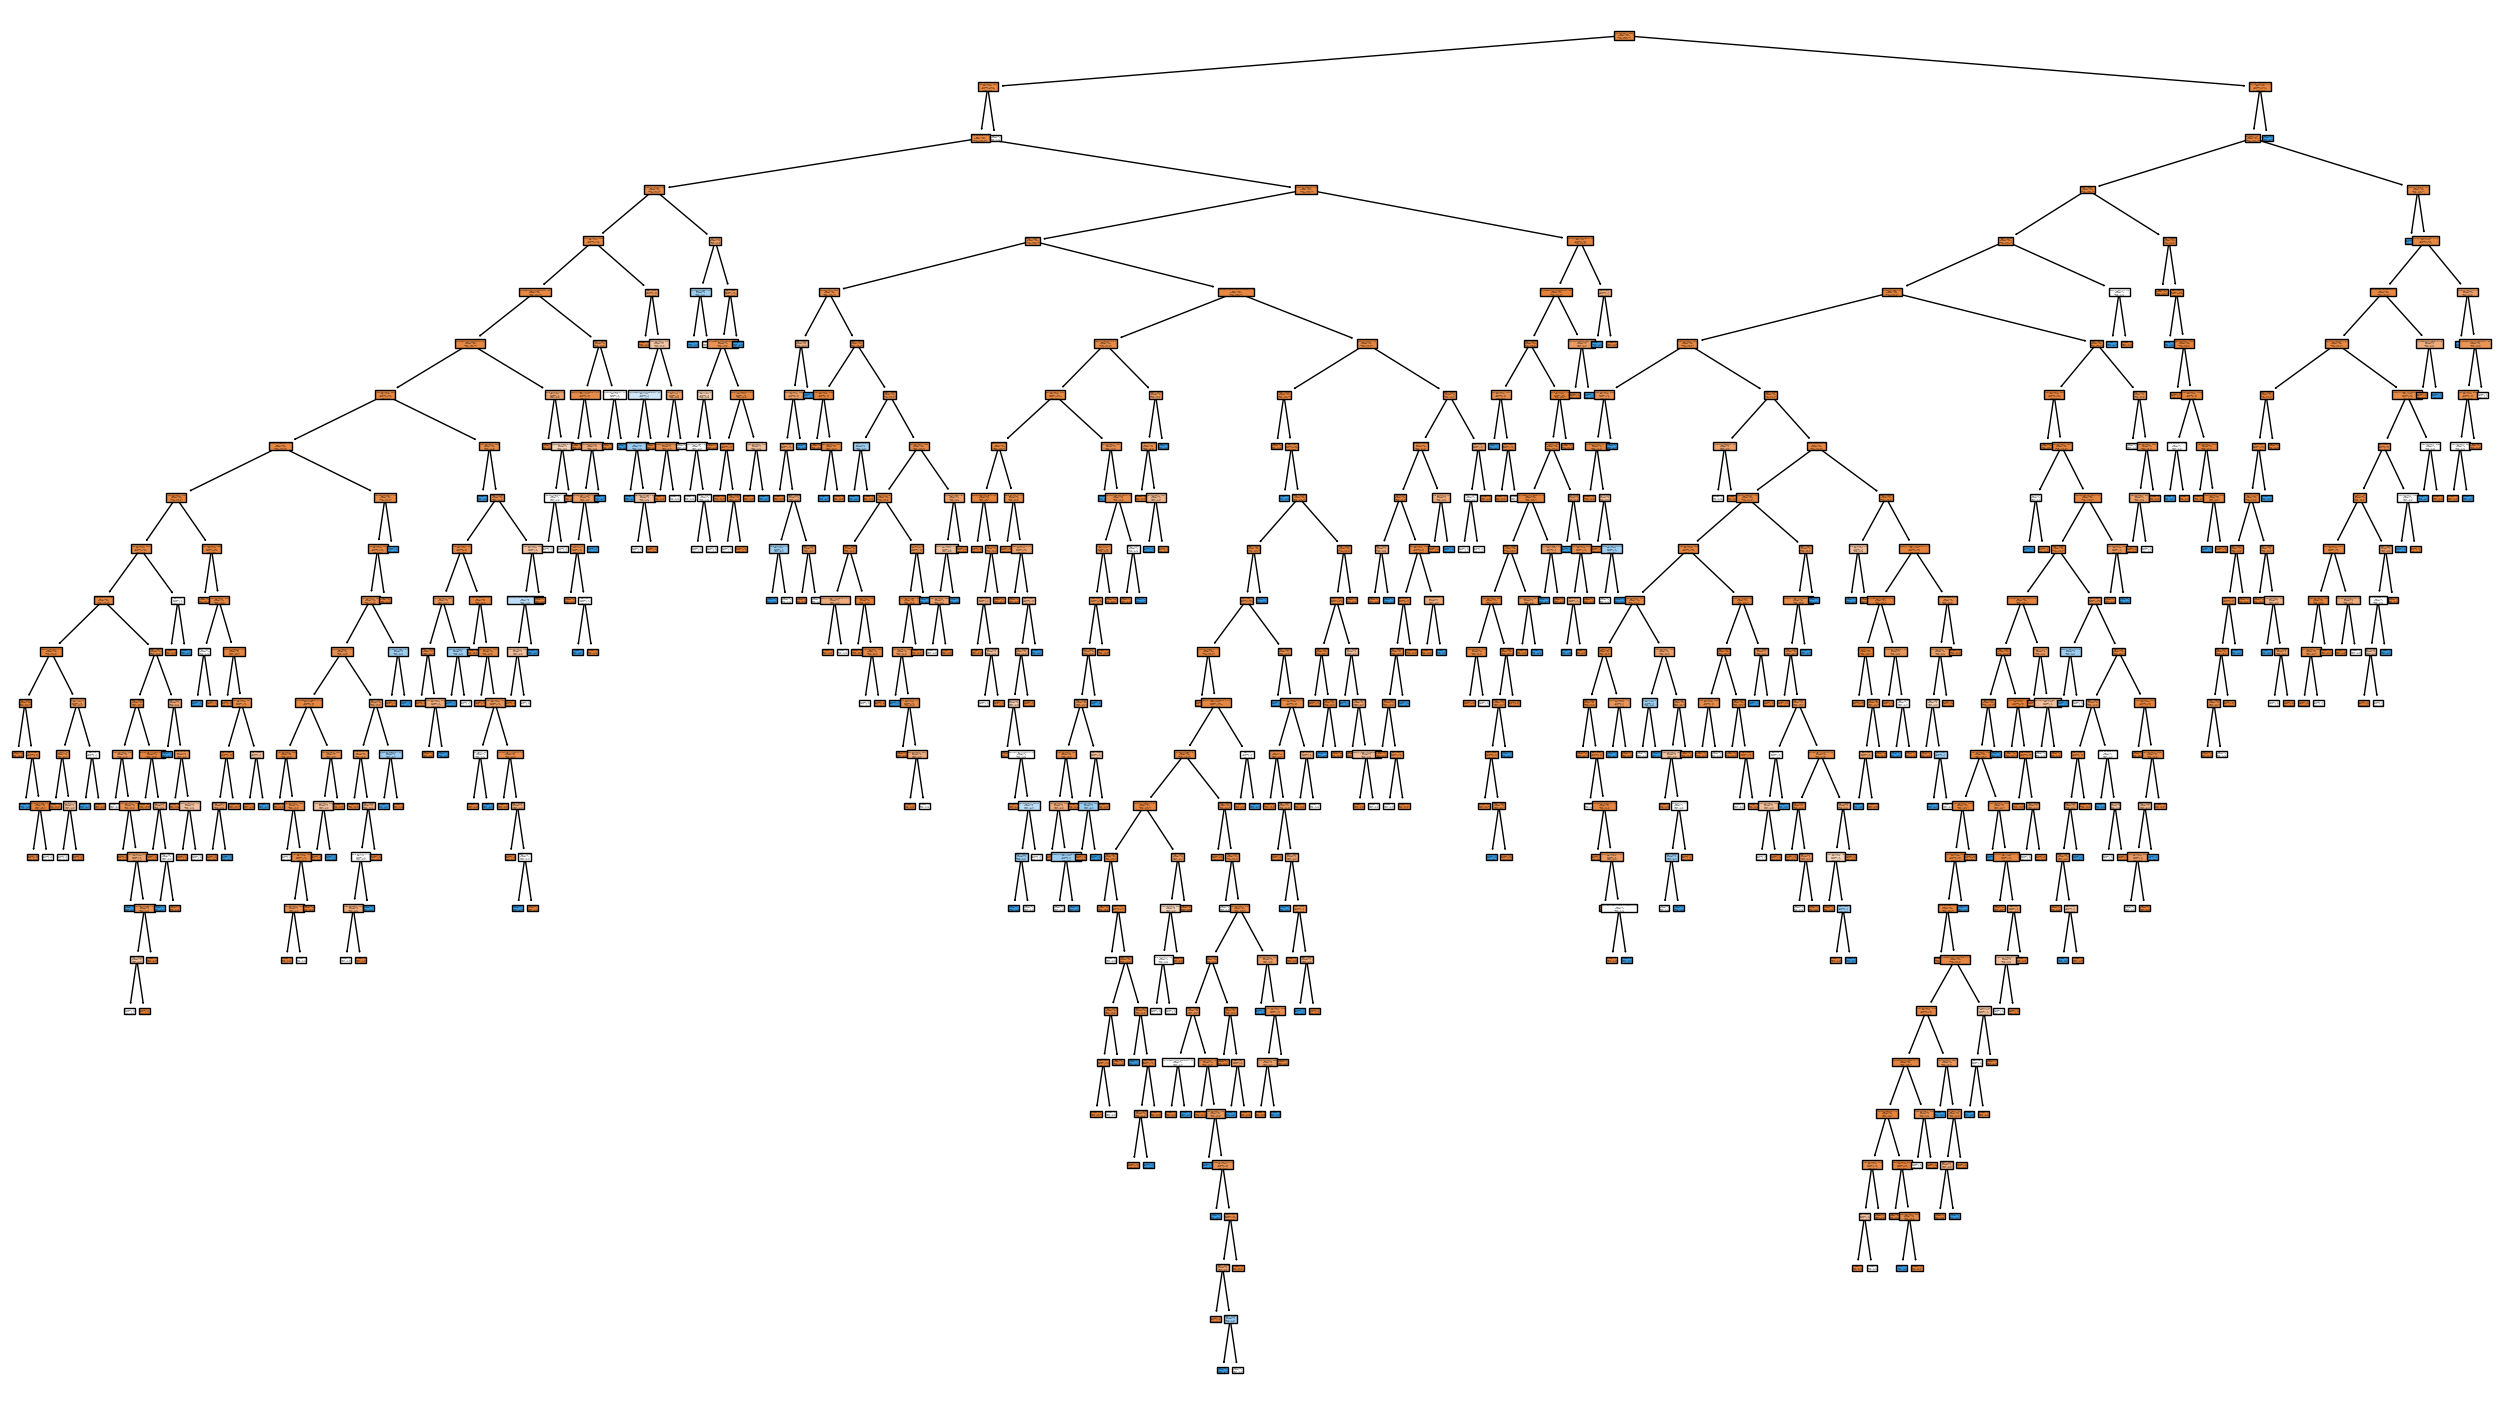

In [9]:
# 3
plt.figure(figsize=(32, 18))
plot_tree(clf_dt,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=X.columns);

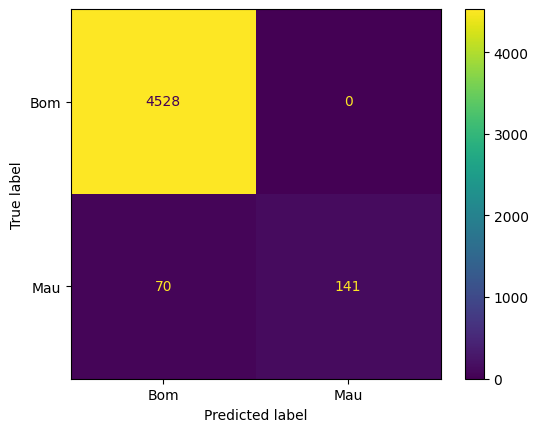

In [32]:
#4 
ConfusionMatrixDisplay(confusion_matrix(y_train, y_hat_train), display_labels=['Bom', 'Mau']).plot()

In [33]:
print(f'Acuracia do modelo de treino: {accuracy_score(y_train, y_hat_train) * 100:.2f}%')

Acuracia do modelo de treino: 98.52%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

Acuracia do modelo de teste: 99.46%


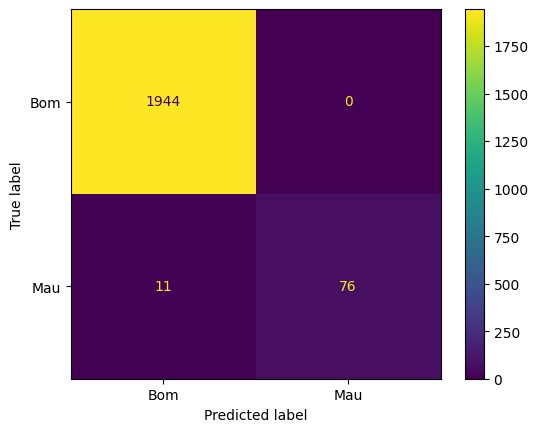

In [34]:
# 1 - 3 
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_test,y_test)
y_hat_test = clf.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat_test), display_labels=['Bom', 'Mau']).plot()
print(f'Acuracia do modelo de teste: {accuracy_score(y_test, y_hat_test) * 100:.2f}%')

classificados como mau: 0.57%
Acuracia do modelo no treino: 95.65%
Acuracia do modelo no teste: 95.37%


(2031, 28)

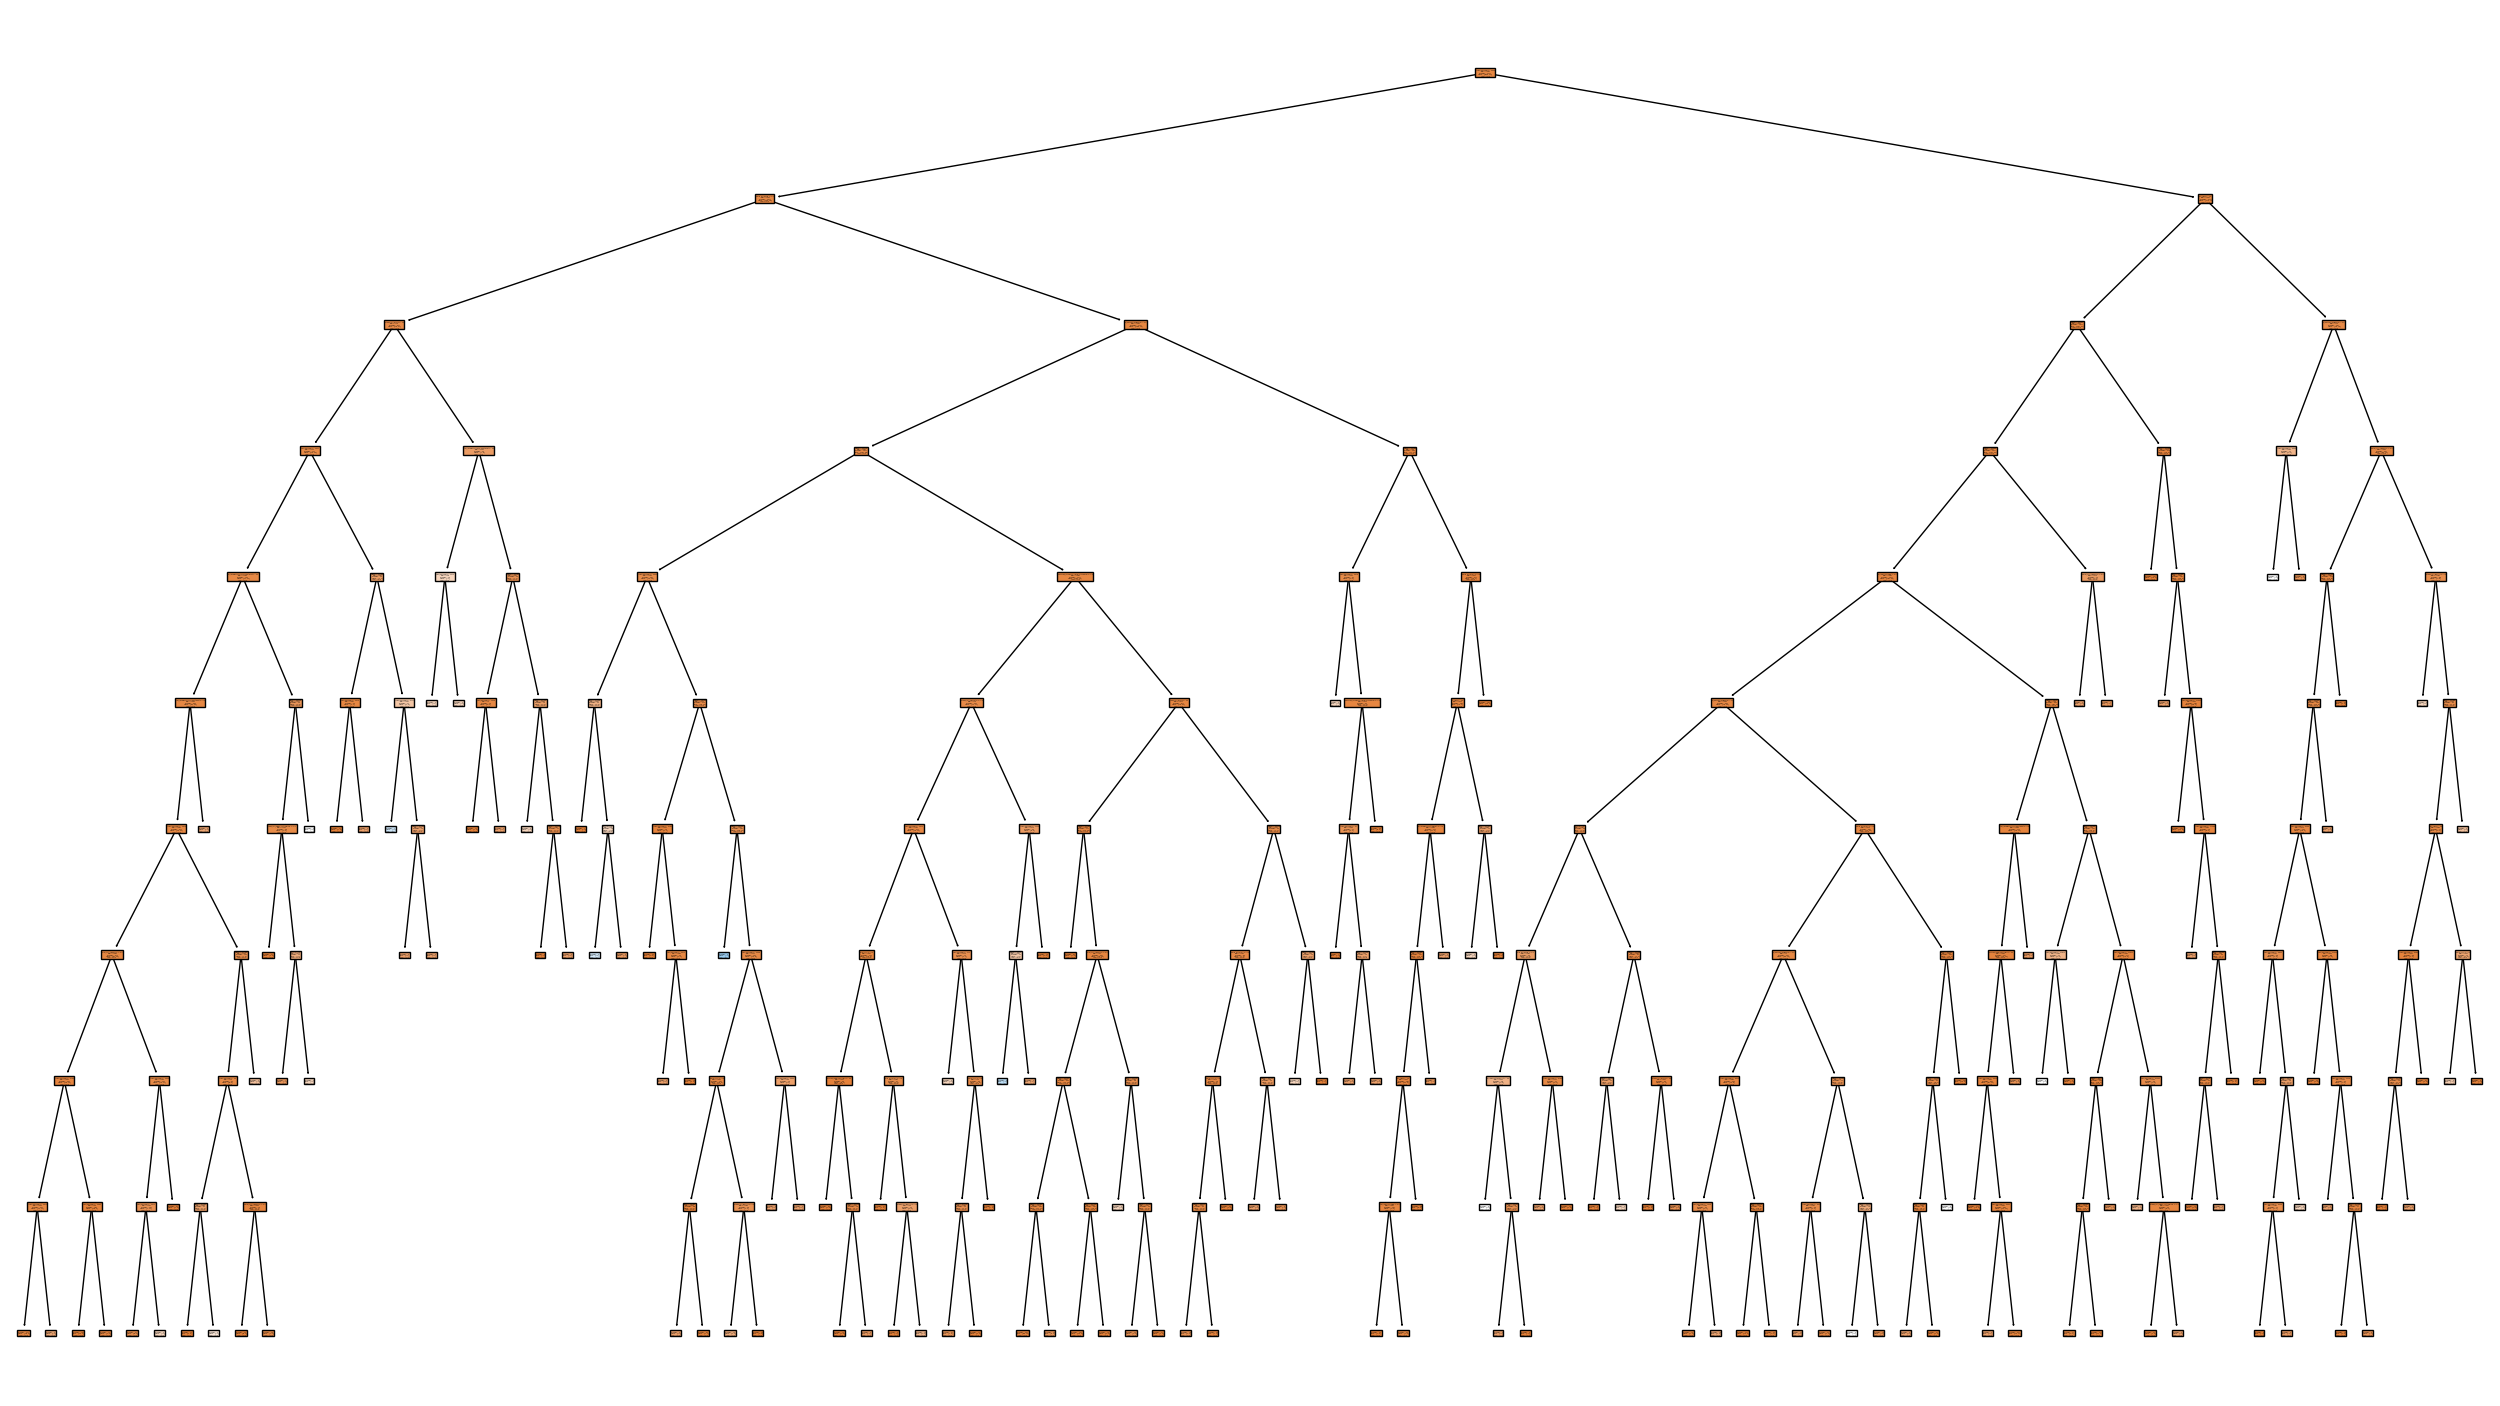

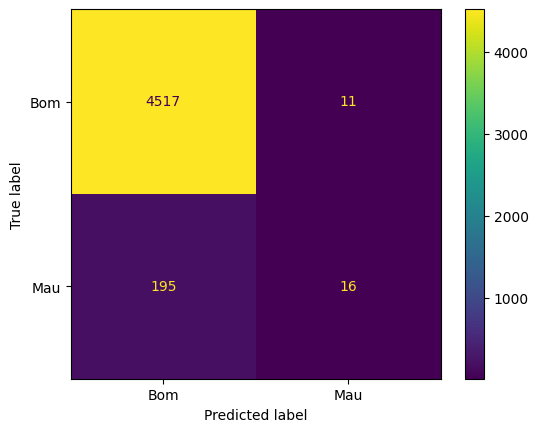

In [44]:
# 4 
pre_prun_clf = DecisionTreeClassifier(max_depth=10 ,random_state=123, min_samples_leaf=5)
pre_prun_clf = pre_prun_clf.fit(X_train,y_train)
plt.figure(figsize=(32, 18))
plot_tree(pre_prun_clf,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=X.columns);

y_hat_train = pre_prun_clf.predict(X_train)
y_hat_test = pre_prun_clf.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_train, y_hat_train), display_labels=['Bom', 'Mau']).plot()
print(f'classificados como mau: {np.count_nonzero(y_hat_train)/len(y_hat_train) * 100:.2f}%')
print(f'Acuracia do modelo no treino: {accuracy_score(y_train, y_hat_train) * 100:.2f}%')
print(f'Acuracia do modelo no teste: {accuracy_score(y_test, y_hat_test) * 100:.2f}%')
X_test.shape

Acuracia do modelo chutando todos como normal no treino: 95.55%
Acuracia do modelo chutando todos como normal no teste: 95.72%


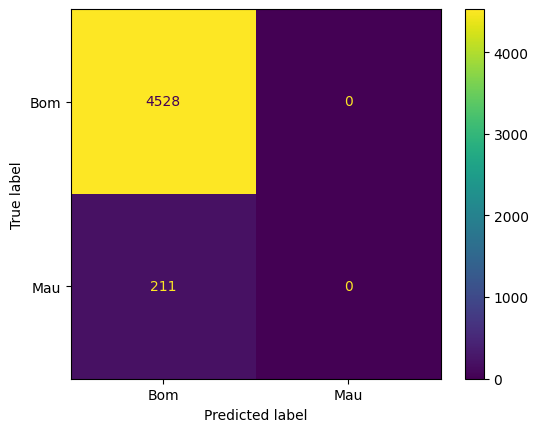

In [40]:
#5
y_hat_all_good = np.zeros(len(y_train))
y_hat_test_ag = np.zeros(len(y_test))
ConfusionMatrixDisplay(confusion_matrix(y_train, y_hat_all_good), display_labels=['Bom', 'Mau']).plot()
print(f'Acuracia do modelo chutando todos como normal no treino: {accuracy_score(y_train, y_hat_all_good) * 100:.2f}%')
print(f'Acuracia do modelo chutando todos como normal no teste: {accuracy_score(y_test, y_hat_test_ag) * 100:.2f}%')

# Pode ser que não assumir que todos são bons pagadores seja melhor, dada que a diferença é minima, e na base de teste, o modelo teve até mais acuracia.